In [1]:
from typing import TypedDict, Literal
from langchain_openai import ChatOpenAI
from pydantic import BaseModel, Field
from langchain.prompts import PromptTemplate
from langchain_core.messages import HumanMessage, AIMessage, SystemMessage
from langgraph.graph import StateGraph, START, END
import os 
from dotenv import load_dotenv 
load_dotenv()

True

### Graph State Management

In [2]:
class SDLCState(TypedDict):
    requirements: str 
    design: str 
    implementation: str
    testing: str
    deployment: str
    maintenance: str
    feedback: str
    project_goal: str

### Input Models

In [3]:
class ProjectGoalInput(BaseModel):
    project_goal: str = Field(..., description = "The main objective of the project")

llm = ChatOpenAI(model="gpt-4o-mini") 

### **Nodes**

In [4]:
def requirements_node(state: SDLCState) -> SDLCState:
    prompt = PromptTemplate(
        template=(
            "You are an SDLC Requirements Analyst.\n"
            "Project Goal: {project_goal}\n\n"
            "Step 1: Break down requirements into functional and non-functional.\n"
            "Step 2: Identify stakeholders and constraints.\n"
            "Step 3: Output a clear and concise requirement specification."
        ), 
        input_variables=["project_goal"]
    )
    formatted_prompt = prompt.format(project_goal = state["project_goal"])

    response = llm.invoke([HumanMessage(content=formatted_prompt)]).content

    return {"requirements": response}

In [5]:
def design_node(state: SDLCState) -> SDLCState:
    prompt = PromptTemplate(
        input_variables=["requirements"],
        template=(
            "You are an SDLC System Architect.\n"
            "Requirements:\n{requirements}\n\n"
            "Create a detailed architecture design including:\n"
            "- High-level architecture diagram\n"
            "- Database design\n"
            "- Technology stack\n"
            "- API specifications"
        )
    )
    formatted_prompt = prompt.format(requirements = state["requirements"])

    response = llm.invoke([HumanMessage(content=formatted_prompt)]).content

    return {"design": response}

In [6]:
def implementation_node(state: SDLCState) -> SDLCState:
    prompt = PromptTemplate(
        input_variables=["design"],
        template=(
            "You are an SDLC Software Developer.\n"
            "Design Document:\n{design}\n\n"
            "Convert the design into a working code summary including:\n"
            "- Modules implemented\n"
            "- Key functions\n"
            "- Integration details"
        )
    )

    formatted_prompt = prompt.format(design = state["design"])

    response = llm.invoke([HumanMessage(content=formatted_prompt)]).content

    return {"implementation": response}

In [7]:
def testing_node(state: SDLCState) -> SDLCState:
    prompt = PromptTemplate(
        input_variables=["implementation"],
        template=(
            "You are an SDLC QA Tester.\n"
            "Code Summary:\n{implementation}\n\n"
            "Test the implementation and provide:\n"
            "- Test cases executed\n"
            "- Pass/Fail status\n"
            "- Bugs found"
        )
    )

    formatted_prompt = prompt.format(implementation = state["implementation"])

    response = llm.invoke([HumanMessage(content=formatted_prompt)]).content

    return {"testing": response}

In [8]:
def deployment_node(state: SDLCState) -> SDLCState:
    prompt = PromptTemplate(
        input_variables=["testing"],
        template=(
            "You are an SDLC DevOps Engineer.\n"
            "Testing Summary:\n{testing}\n\n"
            "Prepare deployment steps for production environment."
        )
    )

    formatted_prompt = prompt.format(testing = state["testing"])

    response = llm.invoke([HumanMessage(content=formatted_prompt)]).content

    return {"deployment": response}

In [9]:
def maintenance_node(state: SDLCState) -> SDLCState:
    prompt = PromptTemplate(
        input_variables=["deployment"],
        template=(
            "You are an SDLC Maintenance Engineer.\n"
            "Deployment Summary:\n{deployment}\n\n"
            "Monitor application, report issues, and suggest fixes."
        )
    )

    formatted_prompt = prompt.format(deployment = state["deployment"])

    response = llm.invoke([HumanMessage(content=formatted_prompt)]).content

    return {"maintenance": response}

In [10]:
def feedback_node(state: SDLCState) -> SDLCState:
    prompt = PromptTemplate(
        input_variables=["maintenance"],
        template=(
            "You are an SDLC Client Feedback Manager.\n"
            "Maintenance Summary:\n{maintenance}\n\n"
            "Collect client feedback and improvement suggestions."
        )
    )

    formatted_prompt = prompt.format(maintenance = state["maintenance"])

    response = llm.invoke([HumanMessage(content=formatted_prompt)]).content
    
    return {"feedback": response}

In [11]:
# Conditional edge
def testing_condition(state: SDLCState) -> Literal["deploy", "fix"]:
    return "deploy" if "pass" in state["testing"].lower() else "fix"

In [12]:
graph = StateGraph(SDLCState) 

# Add nodes
graph.add_node("requirements", requirements_node)
graph.add_node("design", design_node)
graph.add_node("implementation", implementation_node)
graph.add_node("testing", testing_node)
graph.add_node("deployment", deployment_node)
graph.add_node("maintenance", maintenance_node)
graph.add_node("feedback", feedback_node)

# edges
graph.add_edge(START, "requirements") 
graph.add_edge("requirements", "design")
graph.add_edge("design", "implementation")
graph.add_edge("implementation", "testing")
graph.add_conditional_edges("testing", testing_condition, {"deploy": "deployment", "fix": "implementation"})
graph.add_edge("deployment", "maintenance")
graph.add_edge("maintenance", "feedback")
graph.add_edge("feedback", END)

app = graph.compile()

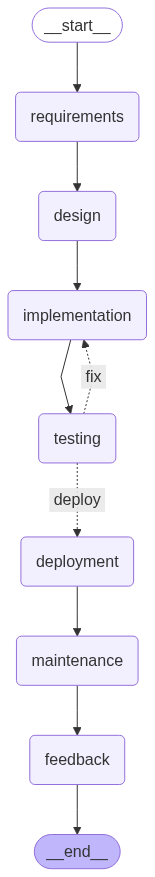

In [13]:
app

In [14]:
user_goal = input("Enter your project goal: ")
result = app.invoke({"project_goal": user_goal})

In [15]:
result

{'requirements': '### Step 1: Breakdown of Requirements\n\n#### Functional Requirements\n1. **User Management**\n   - User registration and authentication\n   - User profile management (personal info, shipping address)\n   - Password recovery mechanism\n   \n2. **Product Management**\n   - Admin interface to add, update, and delete products\n   - Product categorization and tagging \n   - Product search and filtering capabilities\n\n3. **Shopping Cart**\n   - Ability to add/remove products\n   - Update quantities of products in the cart\n   - Persist cart items for logged-in users\n   \n4. **Checkout Process**\n   - User-friendly checkout process\n   - Multiple payment options (credit card, PayPal, etc.)\n   - Order summary page before final submission\n   - Payment processing and confirmation of orders\n\n5. **Order Management**\n   - View and manage past orders for users\n   - Admin interface for overseeing orders\n   - Order status tracking (e.g., pending, shipped, delivered)\n\n6. *

In [16]:
print("\n=== Final SDLC Output ===")
for stage, content in result.items():
    print(f"\n[{stage.upper()}]\n{content}")


=== Final SDLC Output ===

[REQUIREMENTS]
### Step 1: Breakdown of Requirements

#### Functional Requirements
1. **User Management**
   - User registration and authentication
   - User profile management (personal info, shipping address)
   - Password recovery mechanism
   
2. **Product Management**
   - Admin interface to add, update, and delete products
   - Product categorization and tagging 
   - Product search and filtering capabilities

3. **Shopping Cart**
   - Ability to add/remove products
   - Update quantities of products in the cart
   - Persist cart items for logged-in users
   
4. **Checkout Process**
   - User-friendly checkout process
   - Multiple payment options (credit card, PayPal, etc.)
   - Order summary page before final submission
   - Payment processing and confirmation of orders

5. **Order Management**
   - View and manage past orders for users
   - Admin interface for overseeing orders
   - Order status tracking (e.g., pending, shipped, delivered)

6. **Inv